In [9]:
import pandas as pd
import difflib
import string

*Функция рисующая гистограму из объекта Series. Вторым необязательным аргументом можно задать количество графиков*

In [10]:
def show_histogram(series: pd.Series, max_words = 10):
    series.sort_values(inplace=True, ascending=False)
    series[:max_words].plot(kind='bar', use_index=True)

*Упезанная реализация алгоритма DBSCAN. На вход принимает массив объектов Р, радиус выборк eps, количество соседий m, алгоритм вычисления дистанции distance. Возвращает словарь, где ключь - слово, значение - количество повторений. Под индексом 0 хранятся слова, которые встретились один раз*

In [11]:
def count_words(P, eps, m, distance):
    NOISE = 0
    clusters = {NOISE: []}
    visited_points = set()
    while len(P) > 0:
        p = P.pop()
        visited_points.add(p)
        neighbors = [q for q in P if distance(p, q) < eps]
        if len(neighbors) < m:
            clusters[NOISE].append(p)
        else:
            visited_points = visited_points.union(set(neighbors))
            P = list(filter(lambda i: i not in visited_points, P))
            neighbors.append(p)
            clusters[p] = neighbors
    return clusters

*Принимает на вход массив объектов. Отдает объект Series, где индексы это слова, а значения - их повторение. При вызове функции count_words в качестве алгоритма дистанции между объектами используется difflib.SequenceMatcher().ratio()*

In [12]:
def get_series(words, is_show_single=False):
    result = count_words(words, 0.2, 1, lambda p, q: 1 - difflib.SequenceMatcher(a=p.lower(), b=q.lower()).ratio())
    only_one_time = result.pop(0)
    parced_words = {i[0]: len(i) for i in result.values()}
    if is_show_single:
        parced_words.update({i: 1 for i in only_one_time})
    return pd.Series(list(parced_words.values()), index=list(parced_words.keys()))

*Читаем файл, разбиваем строку в массив по пробельному символу. Так же очищаем слова от знаков препинания и исключаем слова длиной менее 3 символов (предлоги и т.п.)*

In [20]:
with open('/Users/tmagkov/projects/pythonclub/itacademy/hometask/2_parse_text/data/book.txt') as f:
    words = f.read().split(' ')
    words = list(
        filter(
            lambda word: word != '' and len(word) > 3,
            map(lambda word: word.strip(string.punctuation + '–\n').lower(), words)
        )
    )
    counted_words = get_series(words)

*Выводим гистограму 10 наиболее популярных слов*

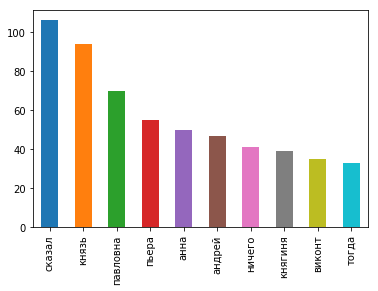

In [22]:
show_histogram(counted_words, 10)

*Считаем количество предложений*

In [34]:
with open('/Users/tmagkov/projects/pythonclub/itacademy/hometask/2_parse_text/data/book.txt') as f:
    sentences = f.read().replace('\n', ' ').split('.')
    ser_sentences = pd.Series(sentences)
    ser_len = pd.Series([len(i) for i in sentences])
    sentences_df = pd.DataFrame({
        'Sentence': ser_sentences,
        'Sentence length': ser_len
    })
    

In [35]:
sentences_df

,Sentence,Sentence length
0,Annotation Лев Толстой Война и Мир Том 1 ...,549
1,Genes et Lucques ne sont plus que des apanage...,87
2,"Non, je vous previens, que si vous ne me dite...",305
3,"[Ну, что, князь, Генуа и Лукка стали не больш...",81
4,"Нет, я вас предупреждаю, если вы мне не скаже...",260
5,"] Ну, здравствуйте, здравствуйте",32
6,"Je vois que je vous fais peur, [Я вижу, что я...",83
7,Так говорила в июле 1805 года известная Анна...,192
8,"Анна Павловна кашляла несколько дней, у нее б...",134
9,"В записочках, разосланных утром с красным лак...",128


*Всего видно 589 предложений*